### Comparing naive and trained models

- Fitting a single test image using either a naive model (mechanistic model with gaussian PSF), or a model with trained cytoplasmic and membrane signal profiles as outlined in the paper
- What we see is that the naive model underfits the data, whereas the trained model is able to account for much more of the complexity in the original image
- Quantifying this by RMSE

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import erf, load_image, straighten, ImageQuant2, raw_data_path
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
# Default model
thickness = 50
sigma = 1.5
membg0 = np.exp(-((np.arange(thickness) - thickness / 2) ** 2) / (2 * sigma ** 2))
cytbg0 = (1 + erf((np.arange(thickness) - thickness / 2) / sigma)) / 2
cal0 = np.loadtxt('../../../data/calibration_constants.txt')[0]

# Learnt model
membg1 = np.loadtxt('../../../data/calibration_mem6.txt')
cytbg1 = np.loadtxt('../../../data/calibration_cyt.txt')
cal1 = np.loadtxt('../../../data/calibration_constants.txt')[6]

noise = 700

### Straightened image

In [3]:
df = pd.read_csv('../../../data/par2_nebd_embryos.csv')
if raw_data_path:
    df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
path = df[df.Line == 'nwg338'].Path.iloc[0]

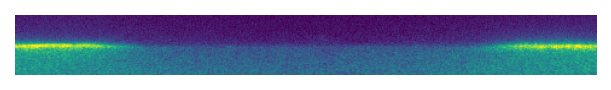

In [4]:
img = load_image(path + '/af_corrected.tif')
roi = np.loadtxt(path + '/ROI_fit.txt')
straight = straighten(img, roi, 50)

fig, ax = plt.subplots()
vmax = np.percentile(straight, 99.9)
ax.imshow(straight, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
fig.set_size_inches(5, 1)
fig.savefig('Figs/truth.png', dpi=600, transparent=True)

### Quantification 0

In [5]:
iq0 = ImageQuant2(img=img, roi=roi, cytbg=cytbg0, membg=membg0, pooling_rate=1)
iq0.quantify()
iq0.mems[0]*= cal0

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<04:29,  2.22it/s]

  5%|█████                                                                                                        | 28/600 [00:00<00:08, 66.68it/s]

  9%|█████████▉                                                                                                  | 55/600 [00:00<00:04, 118.51it/s]

 14%|██████████████▊                                                                                             | 82/600 [00:00<00:03, 158.45it/s]

 18%|███████████████████▎                                                                                       | 108/600 [00:00<00:02, 185.42it/s]

 22%|███████████████████████▉                                                                                   | 134/600 [00:00<00:02, 205.53it/s]

 27%|████████████████████████████▌                                                                              | 160/600 [00:01<00:02, 219.60it/s]

 31%|████████████████████████████████▉                                                                          | 185/600 [00:01<00:01, 227.47it/s]

 35%|█████████████████████████████████████▋                                                                     | 211/600 [00:01<00:01, 235.61it/s]

 40%|██████████████████████████████████████████▎                                                                | 237/600 [00:01<00:01, 235.87it/s]

 44%|██████████████████████████████████████████████▋                                                            | 262/600 [00:01<00:01, 234.13it/s]

 48%|███████████████████████████████████████████████████▌                                                       | 289/600 [00:01<00:01, 241.60it/s]

 53%|████████████████████████████████████████████████████████▌                                                  | 317/600 [00:01<00:01, 251.50it/s]

 57%|█████████████████████████████████████████████████████████████▏                                             | 343/600 [00:01<00:01, 249.41it/s]

 62%|█████████████████████████████████████████████████████████████████▊                                         | 369/600 [00:01<00:00, 252.07it/s]

 66%|██████████████████████████████████████████████████████████████████████▍                                    | 395/600 [00:01<00:00, 253.94it/s]

 70%|███████████████████████████████████████████████████████████████████████████                                | 421/600 [00:02<00:00, 251.47it/s]

 75%|███████████████████████████████████████████████████████████████████████████████▉                           | 448/600 [00:02<00:00, 255.86it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 476/600 [00:02<00:00, 260.64it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 504/600 [00:02<00:00, 263.61it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 531/600 [00:02<00:00, 258.77it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 557/600 [00:02<00:00, 256.25it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 583/600 [00:02<00:00, 250.76it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 213.75it/s]

### Quantification 1

In [6]:
iq1 = ImageQuant2(img=img, roi=roi, cytbg=cytbg1, membg=membg1, pooling_rate=1)
iq1.quantify()
iq1.mems[0]*= cal1

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<02:01,  4.93it/s]

  5%|█████                                                                                                       | 28/600 [00:00<00:05, 112.58it/s]

  9%|█████████▋                                                                                                  | 54/600 [00:00<00:03, 165.10it/s]

 13%|██████████████▍                                                                                             | 80/600 [00:00<00:02, 196.50it/s]

 18%|██████████████████▉                                                                                        | 106/600 [00:00<00:02, 216.48it/s]

 22%|███████████████████████▌                                                                                   | 132/600 [00:00<00:02, 228.40it/s]

 27%|████████████████████████████▌                                                                              | 160/600 [00:00<00:01, 241.93it/s]

 31%|█████████████████████████████████▎                                                                         | 187/600 [00:00<00:01, 248.78it/s]

 36%|█████████████████████████████████████▉                                                                     | 213/600 [00:01<00:01, 250.81it/s]

 40%|██████████████████████████████████████████▌                                                                | 239/600 [00:01<00:01, 252.63it/s]

 44%|███████████████████████████████████████████████▍                                                           | 266/600 [00:01<00:01, 254.49it/s]

 49%|████████████████████████████████████████████████████                                                       | 292/600 [00:01<00:01, 254.59it/s]

 53%|████████████████████████████████████████████████████████▋                                                  | 318/600 [00:01<00:01, 249.92it/s]

 58%|█████████████████████████████████████████████████████████████▋                                             | 346/600 [00:01<00:00, 257.61it/s]

 62%|██████████████████████████████████████████████████████████████████▌                                        | 373/600 [00:01<00:00, 259.81it/s]

 67%|███████████████████████████████████████████████████████████████████████▎                                   | 400/600 [00:01<00:00, 258.42it/s]

 71%|███████████████████████████████████████████████████████████████████████████▉                               | 426/600 [00:01<00:00, 256.78it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▌                          | 452/600 [00:01<00:00, 256.35it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 478/600 [00:02<00:00, 250.70it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 504/600 [00:02<00:00, 238.74it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 530/600 [00:02<00:00, 243.31it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 557/600 [00:02<00:00, 249.04it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 584/600 [00:02<00:00, 254.20it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 235.38it/s]

### Figure: membrane concentration

In [7]:
# fig, ax = plt.subplots()
# ax.plot(iq0.mems[0])
# ax.plot(iq1.mems[0])
# ax.set_ylabel('Concentration\n(a.u.)')
# ax.set_xticks([0, len(iq0.mems[0])])
# ax.set_xticklabels(['0', 'p'])
# ax.set_yticks([])
# ax.set_ylim(bottom=0)
# ax.tick_params(axis='both', labelsize=8)
# # fig.set_size_inches(1.5,1.5)
# # ax.set_ylim(bottom=0)
# # fig.subplots_adjust(left=0.25, bottom=0.25)

### Simulation 0

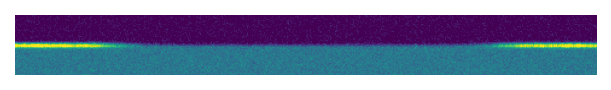

In [8]:
fig, ax = plt.subplots()
sim0 = iq0.straight_images_sim[0] + np.random.normal(scale=noise, size=iq0.straight_images_sim[0].shape)
ax.imshow(sim0, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
fig.set_size_inches(5, 1)
fig.savefig('Figs/model0.png', dpi=600, transparent=True)

### Simulation 1

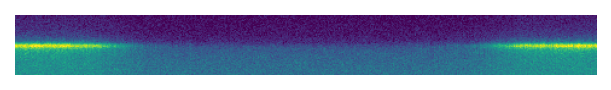

In [9]:
fig, ax = plt.subplots()
sim1 = iq1.straight_images_sim[0] + np.random.normal(scale=noise, size=iq1.straight_images_sim[0].shape)
ax.imshow(sim1, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
fig.set_size_inches(5, 1)
fig.savefig('Figs/model1.png', dpi=600, transparent=True)

### Patches

In [10]:
patch = (50, 120)
zT = straight[:, patch[0]:patch[1]]

z0_noise = sim0[:, patch[0]:patch[1]]
z1_noise = sim1[:, patch[0]:patch[1]]

z0 = iq0.straight_images_sim[0][:, patch[0]:patch[1]]
z1 = iq1.straight_images_sim[0][:, patch[0]:patch[1]]

In [11]:
### Metrics
norm = np.percentile(zT, 99.9)

rmse0 = np.sqrt(np.mean((zT/norm-z0/norm)**2))
rmse1 = np.sqrt(np.mean((zT/norm-z1/norm)**2))

print(rmse0)
print(rmse1)

0.10955542
0.048782337


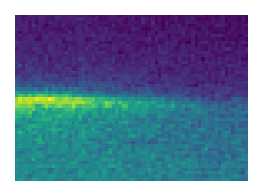

In [12]:
fig, ax = plt.subplots()
ax.imshow(zT, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
fig.set_size_inches(2,2)
fig.savefig('Figs/truth_zoom.png', dpi=600, transparent=True)

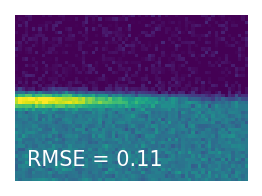

In [13]:
fig, ax = plt.subplots()
ax.imshow(z0_noise, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
ax.text(s='RMSE = %.2f' % rmse0, x=3, y=45, color='w', fontsize=10)
fig.set_size_inches(2,2)
fig.savefig('Figs/model0_zoom.png', dpi=600, transparent=True)

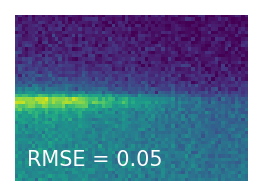

In [14]:
fig, ax = plt.subplots()
ax.imshow(z1_noise, vmin=0, vmax=vmax, cmap='viridis')
ax.axis('off')
ax.text(s='RMSE = %.2f' % rmse1, x=3, y=45, color='w', fontsize=10)
fig.set_size_inches(2,2)
fig.savefig('Figs/model1_zoom.png', dpi=600, transparent=True)